# Gas Giant Size Table distribution fit
*Parse table from csv file*

In [2]:
from pandas import read_csv


df = read_csv('gas_giant_size.csv')
df.head()

,s_mass,s_density,m_mass,m_density,l_mass,l_density,p
0,10,0.42,100,0.18,600,0.31,0.259259
1,15,0.26,150,0.19,800,0.35,0.240741
2,20,0.22,200,0.20,1000,0.40,0.125000
3,30,0.19,250,0.22,1500,0.60,0.115741
4,40,0.17,300,0.24,2000,0.80,0.097222


## Discrete probabilities
*the p column contains probability of the consecutives dice rolls corresponding to the gas giant masses*

In [3]:
s_mass = df.s_mass
m_mass = df.m_mass
l_mass = df.l_mass
y = df.p
y.sum()

0.99537037

*creating random samples of 1000 elements from given probabilities*

In [4]:
from random import choices

s_sample = choices(list(df.s_mass), weights=list(y), k=1000)
m_sample = choices(list(df.m_mass), weights=list(y), k=1000)
l_sample = choices(list(df.l_mass), weights=list(y), k=1000)

<Figure size 432x288 with 0 Axes>

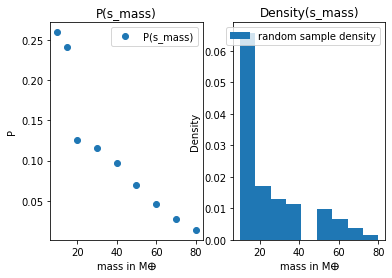

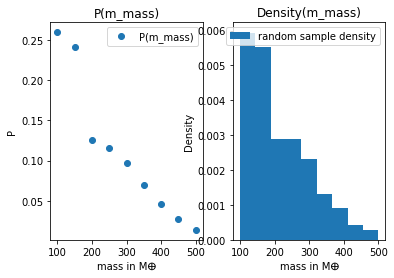

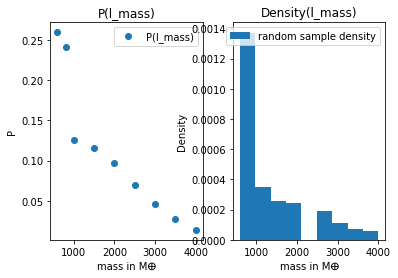

In [5]:
import matplotlib.pyplot as plt


plt.figure(1)
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(s_mass)")
axs[0].plot(s_mass, y, 'o', label='P(s_mass)')
axs[0].set_xlabel('mass in Mⴲ')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(s_mass)")
axs[1].hist(s_sample, density=True, bins=len(s_mass), label='random sample density')
axs[1].set_xlabel('mass in Mⴲ')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.figure(2)
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(m_mass)")
axs[0].plot(m_mass, y, 'o', label='P(m_mass)')
axs[0].set_xlabel('mass in Mⴲ')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(m_mass)")
axs[1].hist(m_sample, density=True, bins=len(m_mass), label='random sample density')
axs[1].set_xlabel('mass in Mⴲ')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.figure(3)
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(l_mass)")
axs[0].plot(l_mass, y, 'o', label='P(l_mass)')
axs[0].set_xlabel('mass in Mⴲ')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(l_mass)")
axs[1].hist(l_sample, density=True, bins=len(l_mass), label='random sample density')
axs[1].set_xlabel('mass in Mⴲ')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

## Continuous random variables fit
*Fitting truncated exponential distributions to the random samples*

### s_mass

In [6]:
import numpy as np

upper, lower = s_mass.max(), s_mass.min()
mu = lower
sigma = np.std(s_sample)
b = (upper - lower) / sigma

b, mu, sigma

(3.9560171958940336, 10, 17.694564137045028)

In [7]:
from scipy.stats import truncexpon
from scipy.stats import kstest

s_dist = truncexpon(b=b, loc=mu, scale=sigma)
s_r = kstest(s_sample, [b, mu, sigma], 'truncexpon')

s_r

KstestResult(statistic=0.489, pvalue=0.3613078523317865)

### m_mass

In [8]:
import numpy as np

upper, lower = m_mass.max(), m_mass.min()
mu = lower
sigma = np.std(m_sample)
b = (upper - lower) / sigma

b, mu, sigma

(4.039180746628937, 100, 99.02998283348332)

In [9]:
from scipy.stats import truncexpon
from scipy.stats import kstest

m_dist = truncexpon(b=b, loc=mu, scale=sigma)
m_r = kstest(m_sample, [b, mu, sigma], 'truncexpon')

m_r

KstestResult(statistic=0.736, pvalue=0.03741674770504455)

### l_mass

In [10]:
import numpy as np

upper, lower = l_mass.max(), l_mass.min()
mu = lower
sigma = np.std(l_sample)
b = (upper - lower) / sigma

b, mu, sigma

(3.898225076569148, 600, 872.1918137657565)

In [11]:
from scipy.stats import truncexpon
from scipy.stats import kstest

l_dist = truncexpon(b=b, loc=mu, scale=sigma)
l_r = kstest(l_sample, [b, mu, sigma], 'truncexpon')

l_r

KstestResult(statistic=0.482, pvalue=0.37839928562372016)

*Density function from the fitted continuous random variable*

In [12]:
s_pdf =  [s_dist.pdf(xi) for xi in s_mass]
m_pdf =  [m_dist.pdf(xi) for xi in m_mass]
l_pdf =  [l_dist.pdf(xi) for xi in l_mass]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [13]:
s_fit_sample = s_dist.rvs(size=10000)
m_fit_sample = m_dist.rvs(size=10000)
l_fit_sample = l_dist.rvs(size=10000)

<Figure size 432x288 with 0 Axes>

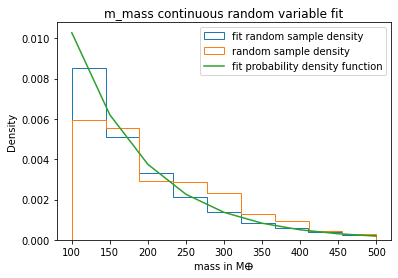

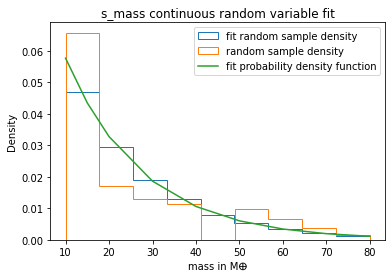

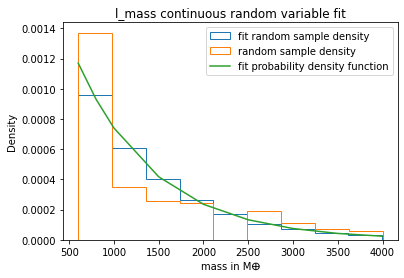

In [14]:
plt.figure(1)
_, ax = plt.subplots()
ax.set_title(r"s_mass continuous random variable fit")
ax.hist(s_fit_sample, density=True, histtype='step', bins=len(s_mass), label='fit random sample density')
ax.hist(s_sample, density=True, histtype='step', bins=len(s_mass), label='random sample density')
ax.plot(s_mass, s_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density')
ax.legend()

plt.figure(2)
_, ax = plt.subplots()
ax.set_title(r"m_mass continuous random variable fit")
ax.hist(m_fit_sample, density=True, histtype='step', bins=len(m_mass), label='fit random sample density')
ax.hist(m_sample, density=True, histtype='step', bins=len(m_mass), label='random sample density')
ax.plot(m_mass, m_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density')
ax.legend()

plt.figure(2)
_, ax = plt.subplots()
ax.set_title(r"l_mass continuous random variable fit")
ax.hist(l_fit_sample, density=True, histtype='step', bins=len(l_mass), label='fit random sample density')
ax.hist(l_sample, density=True, histtype='step', bins=len(l_mass), label='random sample density')
ax.plot(l_mass, l_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density')
ax.legend()

plt.show()

*All generated values in sample must be in interval [10, 80]*

In [15]:
all(v >= s_mass.min() and v <= s_mass.max() for v in s_fit_sample)

True

## Fitting density
*Fit of density values*

In [16]:
s_density = df.s_density
m_density = df.m_density
l_density = df.l_density

### s_density

In [17]:
from scipy.optimize import curve_fit

c = s_density.min()
popt, _ = curve_fit(lambda x, a, b: a * x ** b + c, s_mass, s_density)
a, b = popt
a, b, c

(74.43464003356911, -2.473690314600168, 0.17)

*Predict and score interpollated values with a $r^2$ fitness score*

In [18]:
p_s_density = s_mass.map(lambda x: a * x ** b + c)
r2 = 1 - (np.sum((s_density - p_s_density) ** 2) / np.sum((s_density - np.mean(s_density)) ** 2))
r2

0.9974009521888039

### m_density

In [19]:
from scipy.optimize import curve_fit

popt, _ = curve_fit(lambda x, a, b: a * x + b, m_mass, m_density)
a, b = popt
a, b

(0.0002766666669434452, 0.15033333325029977)

*Predict and score interpollated values with a $r^2$ fitness score*

In [20]:
p_m_density = m_mass.map(lambda x: a * x + b)
r2 = 1 - (np.sum((m_density - p_m_density) ** 2) / np.sum((m_density - np.mean(m_density)) ** 2))
r2

0.9897988505747127

### l_density

In [21]:
from scipy.optimize import curve_fit

popt, _ = curve_fit(lambda x, a, b: a * x + b, l_mass, l_density)
a, b = popt
a, b

(0.0003880597018732323, 0.036185736947409355)

*Predict and score interpollated values with a $r^2$ fitness score*

In [22]:
p_l_density = l_mass.map(lambda x: a * x + b)
r2 = 1 - (np.sum((l_density - p_l_density) ** 2) / np.sum((l_density - np.mean(l_density)) ** 2))
r2

0.9983675971405509

<Figure size 432x288 with 0 Axes>

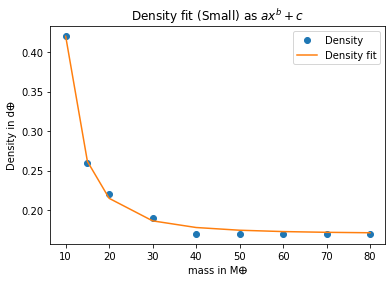

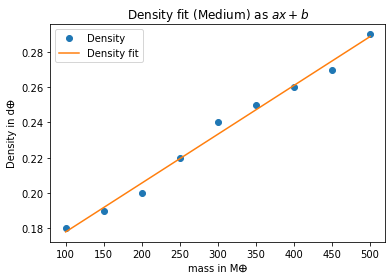

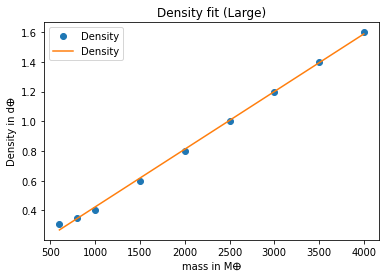

In [23]:
import matplotlib.pyplot as plt


plt.figure(1)
_, ax = plt.subplots()
ax.set_title(r"Density fit (Small) as $ax^b+c$")
ax.plot(s_mass, s_density, 'o', label='Density')
ax.plot(s_mass, p_s_density, '-', label='Density fit')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density in dⴲ')
ax.legend()

plt.figure(2)
_, ax = plt.subplots()
ax.set_title(r"Density fit (Medium) as $ax+b$")
ax.plot(m_mass, m_density, 'o', label='Density')
ax.plot(m_mass, p_m_density, '-', label='Density fit')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density in dⴲ')
ax.legend()

plt.figure(3)
_, ax = plt.subplots()
ax.set_title(r"Density fit (Large)")
ax.plot(l_mass, l_density, 'o', label='Density')
ax.plot(l_mass, p_l_density, '-', label='Density')
ax.set_xlabel('mass in Mⴲ')
ax.set_ylabel('Density in dⴲ')
ax.legend()

plt.show()